In [174]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import sys
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [192]:

with open('imdb_trainX.txt',encoding="utf8") as f:
    dfx = f.readlines()

for index, word in enumerate(dfx):
    dfx[index] = word.strip()
    
with open('imdb_trainY.txt',encoding="utf8") as f:
    dfy = f.readlines()

for index, word in enumerate(dfy):
    dfy[index] = word.strip()

In [193]:
print(dfx[1])

First things first, Edison Chen did a fantastic, believable job as a Cambodian hit-man, born and bred in the dumps and a gladiatorial ring, where he honed his craft of savage battery in order to survive, living on the mantra of kill or be killed. In a role that had little dialogue, or at least a few lines in Cambodian/Thai, his performance is compelling, probably what should have been in the Jet Li vehicle Danny the Dog, where a man is bred for the sole purpose of fighting, and on someone else's leash.<br /><br />Like Danny the Dog, the much talked about bare knuckle fight sequences are not choreographed stylistically, but rather designed as normal, brutal fisticuffs, where everything goes. This probably brought a sense of realism and grit when you see the characters slug it out at each other's throats, in defending their own lives while taking it away from others. It's a grim, gritty and dark movie both literally and figuratively, and this sets it apart from the usual run off the mill

In [194]:
print(dfy[1])

8


In [195]:
stopset=set(stopwords.words('english'))
vectorizer=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [196]:
y=np.array(dfy)

In [197]:
x=vectorizer.fit_transform(dfx)

In [198]:
print(x)

  (0, 39505)	0.1504138733299827
  (0, 44064)	0.11214030107544876
  (0, 60226)	0.12429201266741148
  (0, 57562)	0.12053829063910215
  (0, 46931)	0.1629336496233641
  (0, 16672)	0.12824402534325652
  (0, 67397)	0.19180474740459955
  (0, 6439)	0.13643853883299367
  (0, 63585)	0.21637102385498902
  (0, 53966)	0.14113061266679008
  (0, 58467)	0.1346903181505518
  (0, 72104)	0.09479722056889907
  (0, 23646)	0.12997342368428852
  (0, 23742)	0.12345761991019609
  (0, 8720)	0.11536861302412052
  (0, 44121)	0.28705156909276147
  (0, 53490)	0.16659931819863355
  (0, 49463)	0.23786208646422008
  (0, 120)	0.21303958914630647
  (0, 66242)	0.2932327536011736
  (0, 21227)	0.17229819086739864
  (0, 51884)	0.28274737945815664
  (0, 57747)	0.10733464449878378
  (0, 18642)	0.3925157562869275
  (0, 46106)	0.1844205733216206
  :	:
  (24999, 15396)	0.12721080428006679
  (24999, 74079)	0.09072767078277615
  (24999, 11774)	0.11888213123109767
  (24999, 37768)	0.08847455426655541
  (24999, 21747)	0.379511949966

In [199]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [200]:
print(X_train.shape)

print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16750, 74681)
(16750,)
(8250, 74681)
(8250,)


In [201]:
clf=naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [202]:
y_pred=clf.predict(X_test)
print(y_pred)
print(y_test)

['1' '10' '10' ... '10' '1' '1']
['7' '3' '10' ... '10' '3' '1']


In [203]:
s=0
for i in range(y_pred.shape[0]):
     if(y_pred[i]==y_test[i]):
             s=s+1
       

In [204]:
a=y_pred.shape[0]
print(a)
print(s)

8250
2924


In [205]:
score=(s/a)*100
print(score,"%")

35.442424242424245 %


In [214]:
from sklearn.metrics import confusion_matrix

In [215]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1678   50    0    0    0    0    0    0]
 [ 297 1245    0    0    0    0    0    0]
 [ 716   29    0    0    0    0    0    0]
 [ 698   87    0    0    1    0    0    0]
 [ 728  146    0    0    0    0    0    0]
 [ 320  479    0    0    0    0    1    0]
 [ 273  752    0    0    0    0    1    0]
 [ 147  601    0    0    0    0    1    0]]


Text(69,0.5,'Truth')

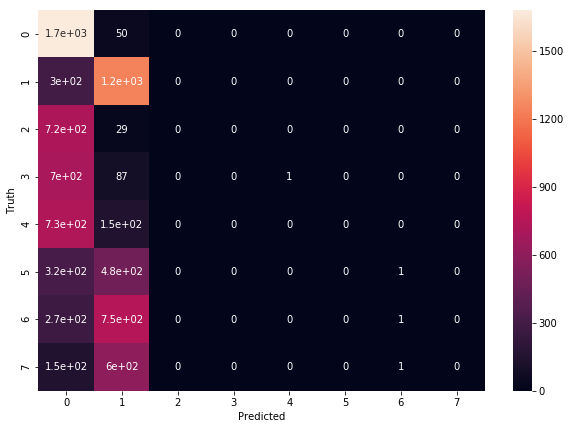

In [191]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [208]:
bnb =naive_bayes.BernoulliNB()

In [209]:
bnb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [210]:
Y_pred=bnb.predict(X_test)
print(y_pred)
print(y_test)

['1' '10' '10' ... '10' '1' '1']
['7' '3' '10' ... '10' '3' '1']


In [211]:
s=0
for i in range(y_pred.shape[0]):
     if(y_pred[i]==y_test[i]):
             s=s+1

In [212]:
a=y_pred.shape[0]
print(a)
print(s)

8250
2924


In [213]:
score=(s/a)*100
print(score,"%")

35.442424242424245 %


In [216]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[1500   86    6   45   73    9    9    0]
 [ 144 1208    0    2   11   49  107   21]
 [ 592   60    3   27   48    7    7    1]
 [ 495  124    3   45   87   15   17    0]
 [ 457  185    1   29  133   34   35    0]
 [ 160  387    0    9   34   98  100   12]
 [ 132  614    0    2   17   91  162    8]
 [  63  513    0    1    5   43  112   12]]


Text(69,0.5,'Truth')

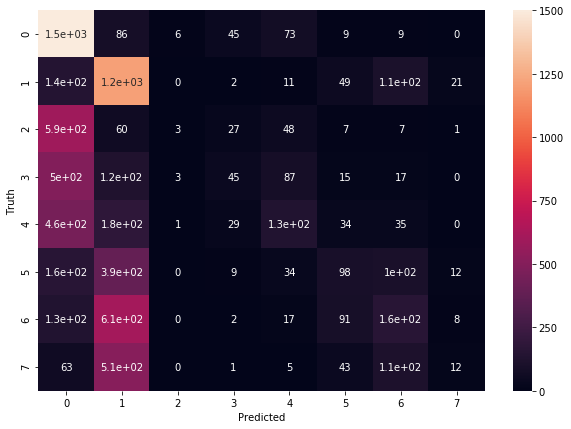

In [217]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')